# Lab 12: Network Visualizations Using NetworkX

This notebook reproduces the analysis and visualizations for Tasks A-C using NetworkX.

In [10]:
# Load libraries
import networkx as nx
import matplotlib.pyplot as plt
from pyparsing import itemgetter
import numpy as np

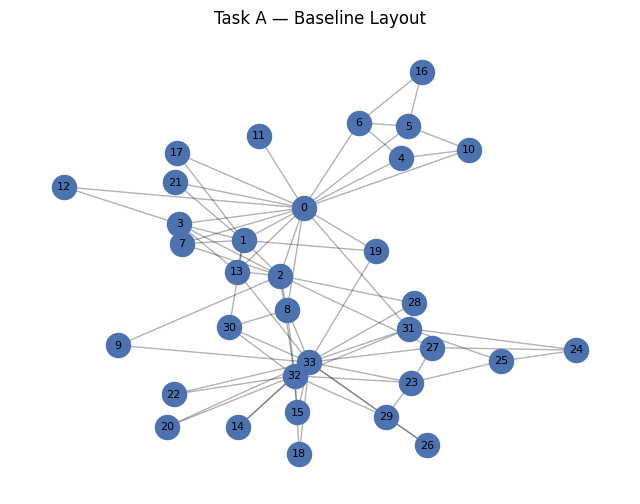

In [11]:
# Task A: Fruchterman-Reingold Layout
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42, k=0.8, iterations=200)

plt.figure(figsize=(8,6))
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='#4C72B0')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Task A — Baseline Layout')
plt.axis('off')
plt.show()

Top 3 nodes by Degree Centrality (node, score):
  Node 33: 0.5152
  Node 0: 0.4848
  Node 32: 0.3636

Top 3 nodes by Betweenness Centrality (node, score):
  Node 0: 0.4376
  Node 33: 0.3041
  Node 32: 0.1452


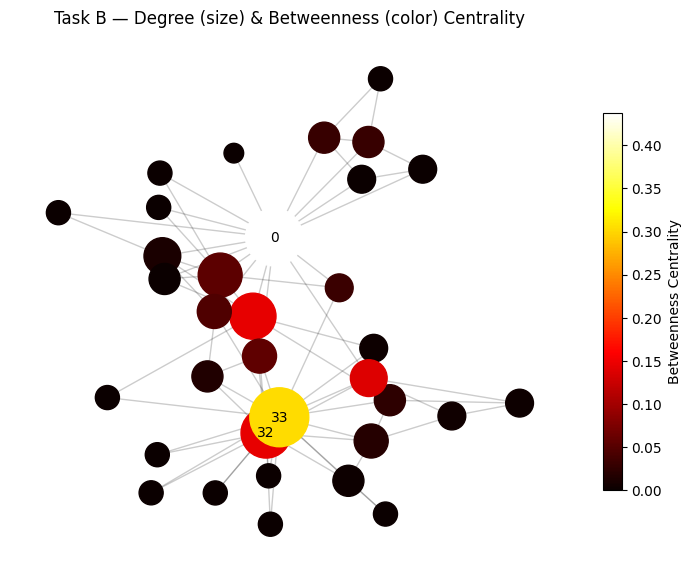

In [12]:
# --- Task B: Centrality Analysis ---

deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G, normalized=True)

# Print top 3 for degree centrality
top3_deg = sorted(deg_cent.items(), key=itemgetter(1), reverse=True)[:3]
print("Top 3 nodes by Degree Centrality (node, score):")
for n, s in top3_deg:
    print(f"  Node {n}: {s:.4f}")

# Print top 3 for betweenness centrality
top3_bet = sorted(bet_cent.items(), key=itemgetter(1), reverse=True)[:3]
print("\nTop 3 nodes by Betweenness Centrality (node, score):")
for n, s in top3_bet:
    print(f"  Node {n}: {s:.4f}")

# Prepare drawing 
min_size = 200
max_size = 1800
deg_vals = np.array([deg_cent[n] for n in G.nodes()])
sizes = min_size + (deg_vals - deg_vals.min()) / (deg_vals.max() - deg_vals.min() + 1e-9) * (max_size - min_size)

# Node colors from betweenness centrality using a colormap
bet_vals = np.array([bet_cent[n] for n in G.nodes()])

fig, ax = plt.subplots(figsize=(9, 7))
edges = nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)
nodes = nx.draw_networkx_nodes(G, pos, node_size=sizes, cmap='hot', 
                               node_color=bet_vals, ax=ax)

# Label only top 2-3 betweenness nodes to avoid clutter
top_bet_nodes = [n for n, _ in top3_bet]
labels = {n: str(n) for n in top_bet_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black', ax=ax)

# Add colorbar to explain node colors
sm = plt.cm.ScalarMappable(cmap='hot', 
                           norm=plt.Normalize(vmin=bet_vals.min(), vmax=bet_vals.max()))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Betweenness Centrality')

ax.set_title("Task B — Degree (size) & Betweenness (color) Centrality")
ax.axis('off')
plt.show()



Girvan-Newman first split (two communities):
Community 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


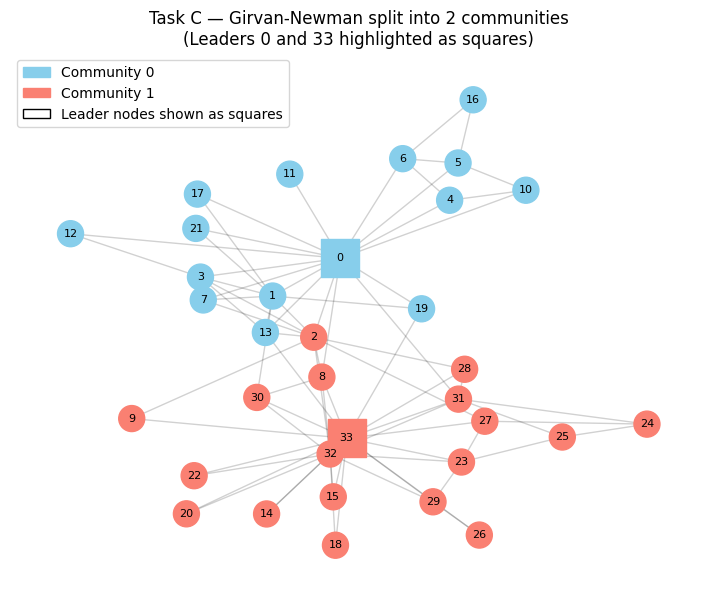

In [ ]:
# --- Task C: Girvan-Newman community detection (split into 2 communities) ---
comp_generator = nx.community.girvan_newman(G)
split = tuple(sorted(c) for c in next(comp_generator))  # two communities
community_1, community_2 = split[0], split[1]

print("\nGirvan-Newman first split (two communities):")
print("Community 1:", community_1)
print("Community 2:", community_2)

# Map node to community index (0 or 1)
community_map = {}
for n in community_1:
    community_map[n] = 0
for n in community_2:
    community_map[n] = 1

# Assign colors based on community ('skyblue' and 'salmon')
color_map = {0: 'skyblue', 1: 'salmon'}
node_colors = [color_map[community_map[n]] for n in G.nodes()]

# Draw with leaders 0 and 33 as squares and bigger
plt.figure(figsize=(9, 7))
nx.draw_networkx_edges(G, pos, alpha=0.18)
# Draw general members as circles
circle_nodes = [n for n in G.nodes() if n not in (0, 33)]
nx.draw_networkx_nodes(G, pos, nodelist=circle_nodes, node_color=[node_colors[list(G.nodes()).index(n)] for n in circle_nodes], node_size=350)
# Draw leaders as squares and larger
nx.draw_networkx_nodes(G, pos, nodelist=[0, 33], node_color=[node_colors[list(G.nodes()).index(0)], node_colors[list(G.nodes()).index(33)]], node_shape='s', node_size=750)
nx.draw_networkx_labels(G, pos, font_size=8)

# Legend (manual)
import matplotlib.patches as mpatches
patch1 = mpatches.Patch(color='skyblue', label='Community 0')
patch2 = mpatches.Patch(color='salmon', label='Community 1')
patch3 = mpatches.Patch(facecolor='white', edgecolor='black', label='Leader nodes shown as squares')
plt.legend(handles=[patch1, patch2, patch3], loc='best')

plt.title("Task C — Girvan-Newman split into 2 communities\n(Leaders 0 and 33 highlighted as squares)")
plt.axis('off')
plt.show()